In [1]:
import numpy as np #arrays, slower exe
import pandas as pd # data cleaning and analysis
import matplotlib.pyplot as plt #plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#cv - preprocessing

In [12]:
import os

path = os.listdir("C:/Users/HP/Desktop/brain_tumor/Training/")
classes = {'no_tumor':0, 'pituitary_tumor':1} #dictionary declaration

In [13]:
import cv2 #understands images
Y = []
X = []
for cls in classes:
    pth = "C:/Users/HP/Desktop/brain_tumor/Training/"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [14]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1) #flatten the size


In [15]:
np.unique(Y)

array([0, 1])

In [16]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [17]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

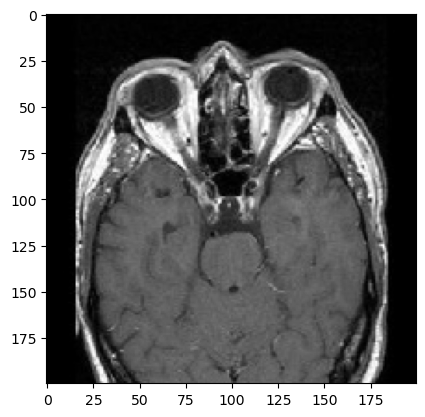

In [18]:
plt.imshow(X[0], cmap='gray')

In [19]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [21]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [22]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [23]:
from sklearn.decomposition import PCA

In [24]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [38]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [37]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [32]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [41]:
pred = sv.predict(xtest)

In [42]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [43]:

print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
0 1


In [44]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

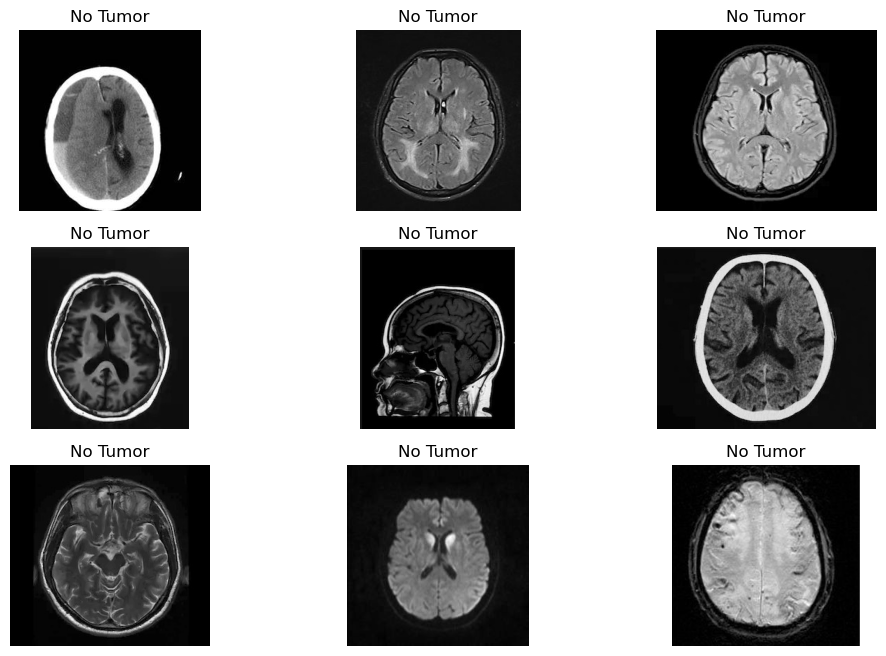

In [46]:
plt.figure(figsize=(12,8))
p = os.listdir("C:/Users/HP/Desktop/brain_tumor/Testing/")
c=1
for i in os.listdir("C:/Users/HP/Desktop/brain_tumor/Testing/no_tumor/")[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread("C:/Users/HP/Desktop/brain_tumor/Testing/no_tumor/"+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

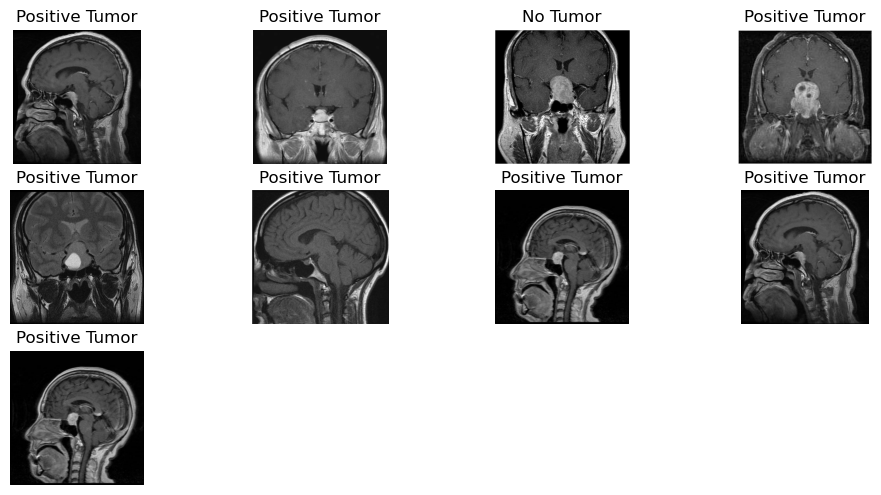

In [48]:

plt.figure(figsize=(12,8))
p = os.listdir("C:/Users/HP/Desktop/brain_tumor/Testing/")
c=1
for i in os.listdir("C:/Users/HP/Desktop/brain_tumor/Testing/pituitary_tumor/")[:9]:
    plt.subplot(4,4,c)
    
    img = cv2.imread("C:/Users/HP/Desktop/brain_tumor/Testing/pituitary_tumor/"+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
#CNN

In [52]:
!pip install umap-learn

     -------------------------------------- 88.2/88.2 kB 552.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 760.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=da3f78a0ef0c39f3407f4fbc36d3f368b1d58f872c4504ec243e47fbe21dff3e
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55496 sha256=0d68824322f41d6e9b25cfd5f1c0e91ca6a3d7ecd94e85387863e820a474ac41
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b9\89\cc\59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [54]:
!pip install tensorflow

In [55]:
!pip install keras

In [57]:
import math
import cv2
import matplotlib.pyplot as plt
import os
import umap
import seaborn as sns
from PIL import Image #format
from scipy import misc #optimization,numpy,
from os import listdir
from os.path import isfile, join #file-availability,
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter #alt-list-dict,hashable-obj-cnt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE #Highdimension-lowdimen,data-visualization
import tensorflow as tf #ml-deeplearning-algorithm
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [249]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))#overfitting-reduce


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 8, 8, 16)         

In [250]:
os.listdir("C:/Users/HP/Desktop/brain_tumor/merge")

['no', 'yes']

In [251]:
yes=os.listdir("C:/Users/HP/Desktop/brain_tumor/merge/yes")
no=os.listdir("C:/Users/HP/Desktop/brain_tumor/merge/no")

In [252]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [253]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [254]:
len(data_target)==len(data)

True

In [255]:
data_target

array([1, 1, 1, ..., 0, 0, 0])

In [256]:
len(data_target)

1401

In [257]:
data

array(['image(1).jpg', 'image(10).jpg', 'image(11).jpg', ...,
       'image(98).jpg', 'image(99).jpg', 'image.jpg'], dtype='<U14')

In [258]:
yes_values=os.listdir("C:/Users/HP/Desktop/brain_tumor/merge/yes")
no_values=os.listdir("C:/Users/HP/Desktop/brain_tumor/merge/no")

In [259]:
len(yes_values)

901

In [260]:
len(no_values)

500

In [261]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread("C:/Users/HP/Desktop/brain_tumor/merge/yes/"+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [262]:
#X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread("C:/Users/HP/Desktop/brain_tumor/merge/no/"+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [263]:
len(X_data)==len(data)==len(data_target)

True

In [264]:
len(X_data)

1401

In [265]:
X = np.squeeze(X_data)

In [266]:
X.shape

(1401, 32, 32, 3)

In [267]:
# normalize data
X = X.astype('float32')
X /= 255

In [268]:
data_target

array([1, 1, 1, ..., 0, 0, 0])

In [278]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[40:] , data_target[40:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

In [279]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [280]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 2s 369ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/150
2/2 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/150
2/2 [==============================] - 0s 129ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/150
2/2 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/150
2/2 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/150
2/2 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/150
2/2 [==============================] - 0s 135ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/150
2/2 [==========

In [281]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=1)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

43/43 [==============================] - 1s 13ms/step - loss: 185.5546 - acc: 0.6326

 Test accuracy: 0.6326230764389038


In [282]:
# Evaluate the model on test set
score = model.evaluate(x_train, y_train, verbose=2)

# Print test accuracy
print('\n', 'Train accuracy:', score[1])

6/6 - 0s - loss: 0.0000e+00 - acc: 1.0000 - 76ms/epoch - 13ms/step

 Train accuracy: 1.0


In [291]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

43/43 [==============================] - 1s 12ms/step


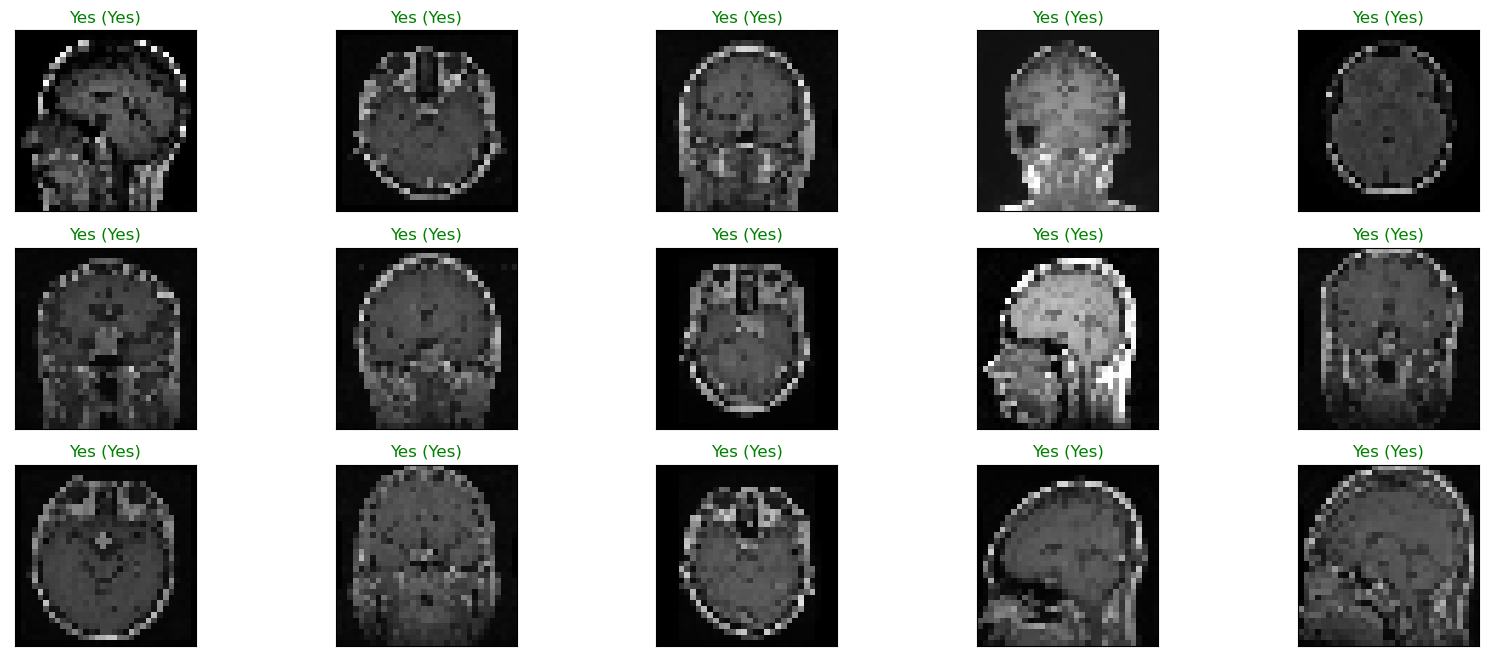

In [292]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [296]:
misclassified=np.where(y_test!=pred)
misclassified

(array([0], dtype=int64),)

In [297]:

print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],y_test[36])

Total Misclassified Samples:  1
0 1
